In [2]:
import seaborn as sns
%matplotlib inline

#### Seaborn comes with built-in datasets

In [5]:
tips=sns.load_dataset('tips')

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Distribution Plots

## distplot

C:\Users\Hp\AppData\Local\Temp\ipykernel_26652\4043199904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

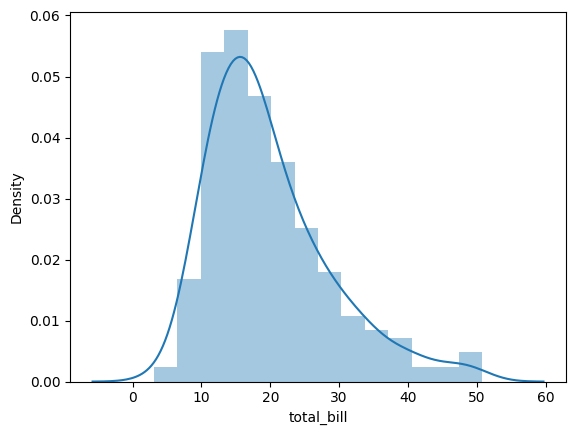

In [7]:
sns.distplot(tips['total_bill'])
#shows distribution of a univariate set of observations

C:\Users\Hp\AppData\Local\Temp\ipykernel_26652\601910355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tip['total_bill'],kde=False, bins=30)


<Axes: xlabel='total_bill'>

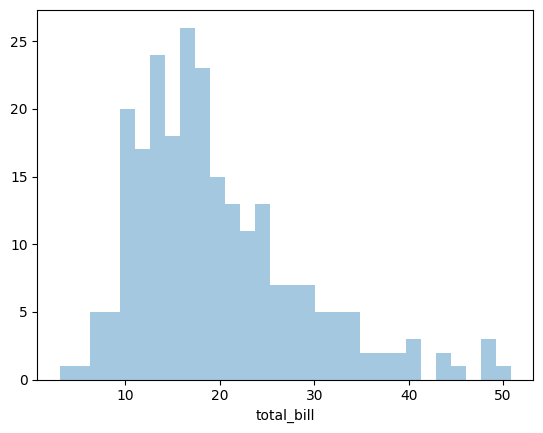

In [8]:
#remove kde and add more bins
sns.distplot(tip['total_bill'],kde=False, bins=30)

## jointplot

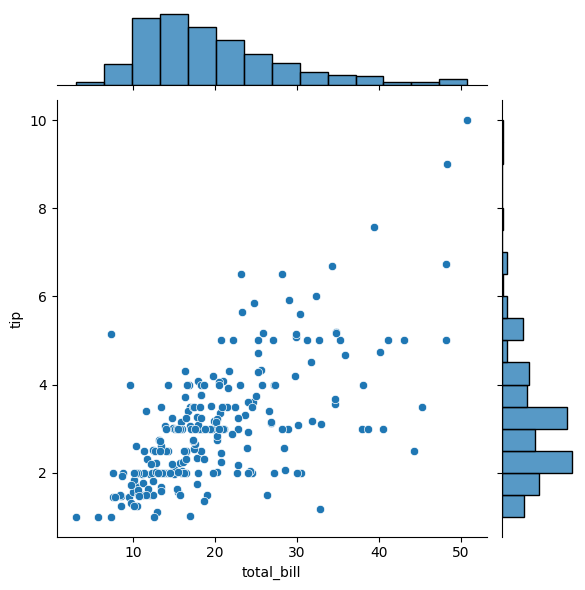

In [9]:
#basically match up two distplots for bivariate data
#kind can be scatter, reg, resid, kde, hex
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

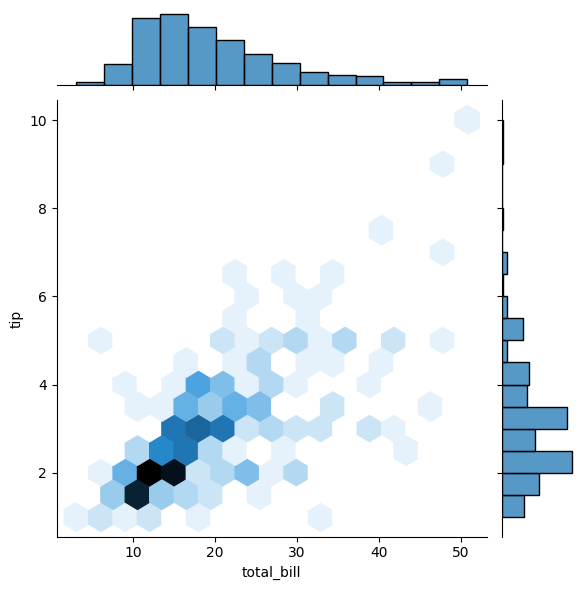

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

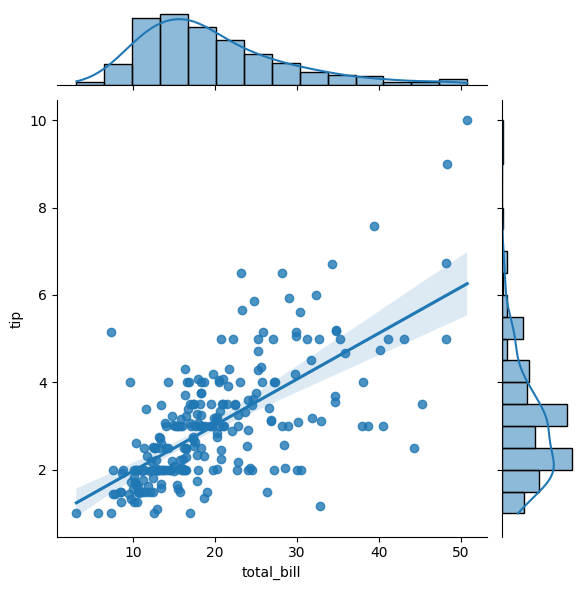

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

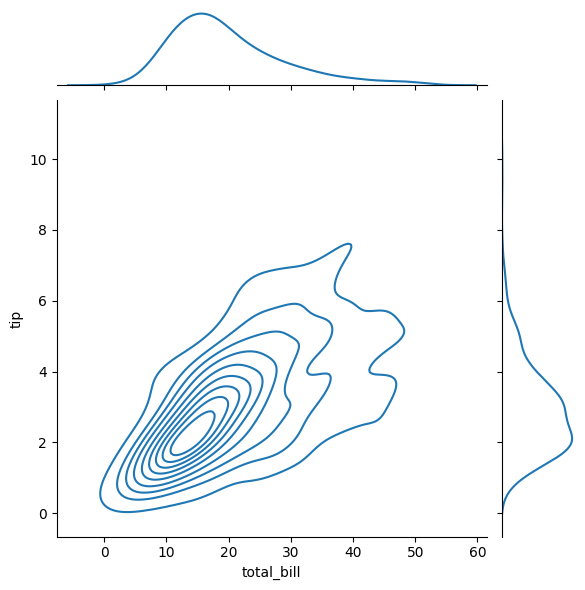

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

## pairplot

In [14]:
#plot pairwise relationships for an entire dataframe(numerical columns)
#supports hue for categorical columns

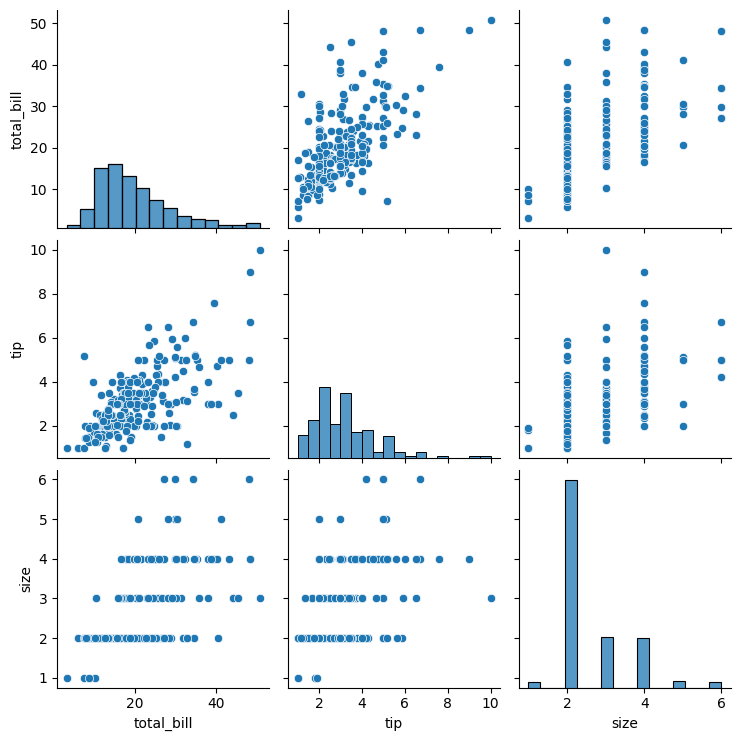

In [15]:
sns.pairplot(tips)

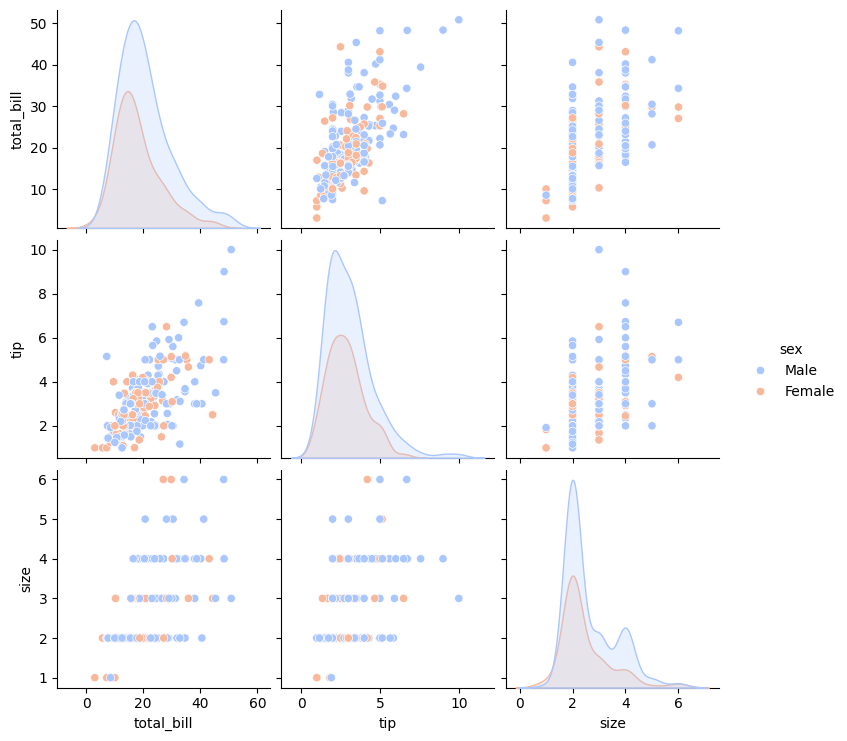

In [16]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

<Axes: xlabel='total_bill'>

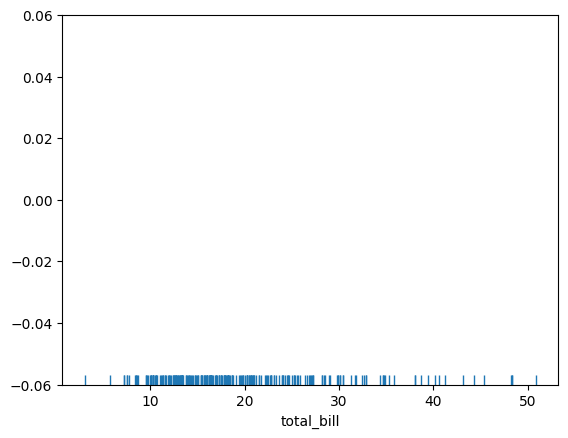

In [18]:
#draw a dash mark for every point in univariate distribution
sns.rugplot(tips['total_bill'])

## kdeplot

In [97]:
#these are kernel density estimation plots. replace every single observation with a gaussian (normal) distribution centered around that value

(0.0, 1.0)

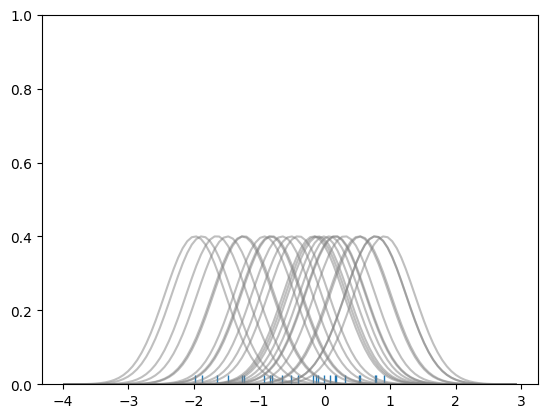

In [20]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

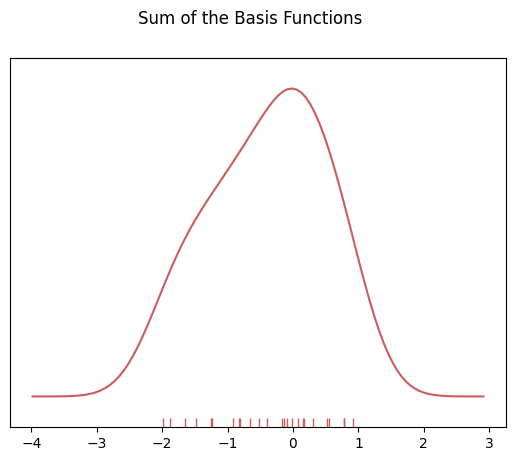

In [21]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

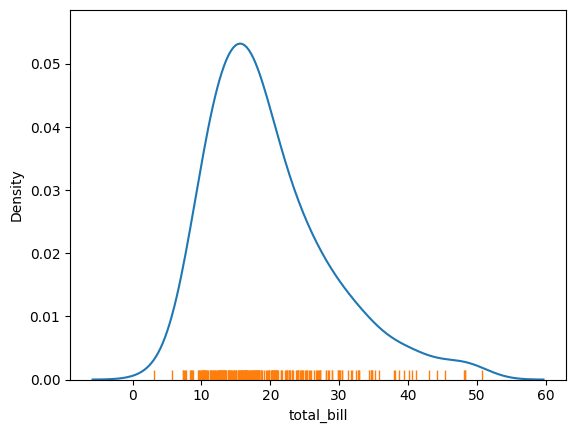

In [22]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

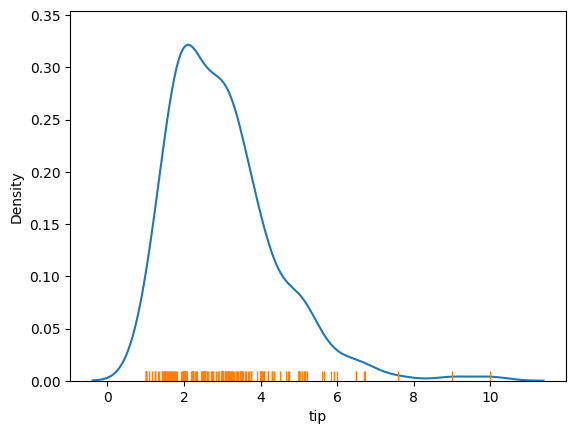

In [23]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Plots

## barplot

<Axes: xlabel='sex', ylabel='total_bill'>

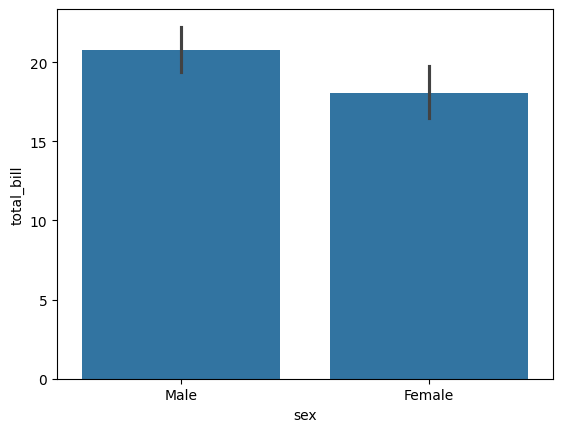

In [26]:
sns.barplot(x='sex',y='total_bill',data=tips)
#aggregate the categorical data based off some function, by default mean

In [27]:
import numpy as np

<Axes: xlabel='sex', ylabel='total_bill'>

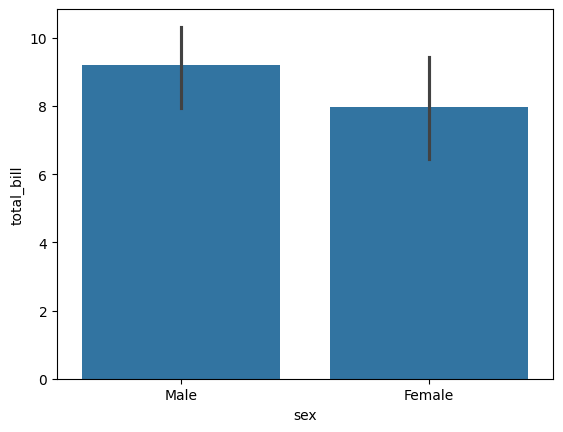

In [28]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
#we can change the estimator object to our own function


## countplot

<Axes: xlabel='sex', ylabel='count'>

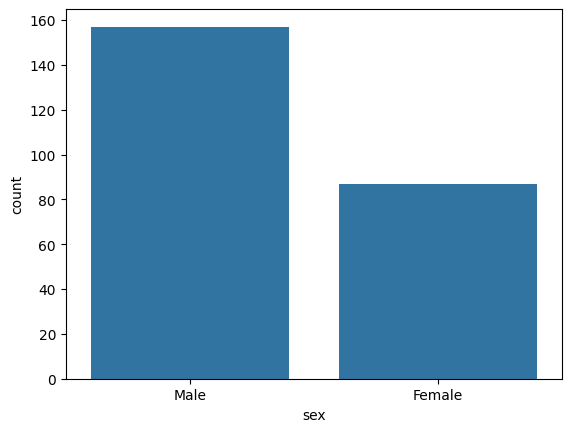

In [29]:
#essentially same as barplot but the estimator is explicitly counting the number of occurrences
sns.countplot(x='sex',data=tips)

## boxplot

C:\Users\Hp\AppData\Local\Temp\ipykernel_26652\2826048410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day',y='total_bill',data=tips,palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

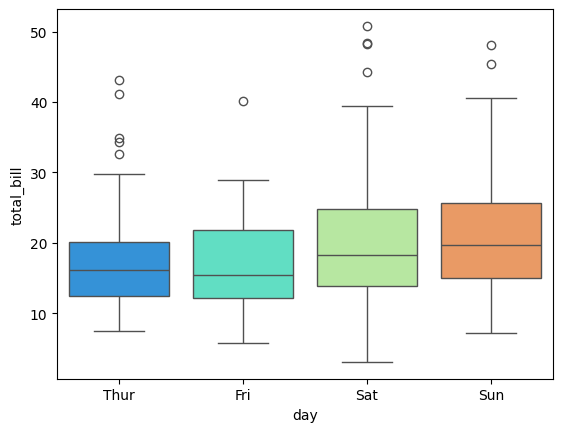

In [30]:
#shows distribution of quantitative data in a way that facilitates comparison between variables across levels of a categorical value
sns.boxplot(x='day',y='total_bill',data=tips,palette='rainbow')

<Axes: >

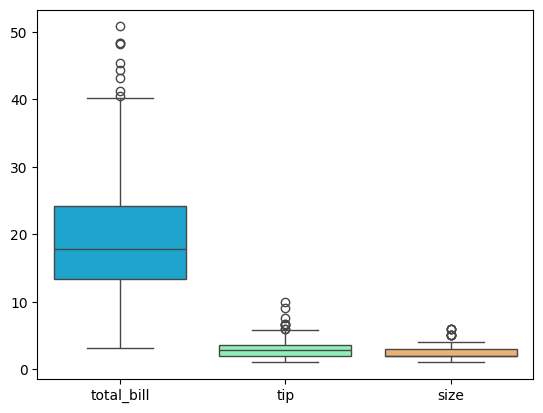

In [31]:
sns.boxplot(data=tips,palette='rainbow')

<Axes: >

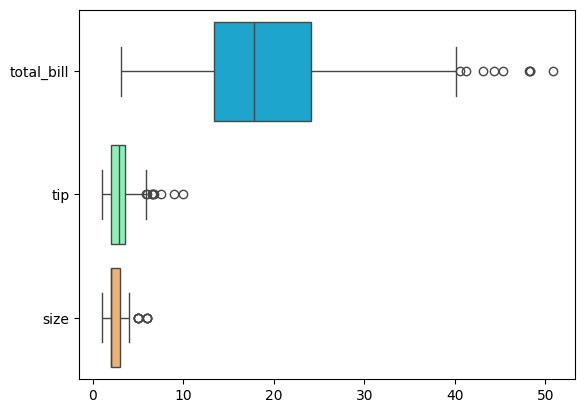

In [32]:
sns.boxplot(data=tips,palette='rainbow',orient='h')

<Axes: xlabel='day', ylabel='total_bill'>

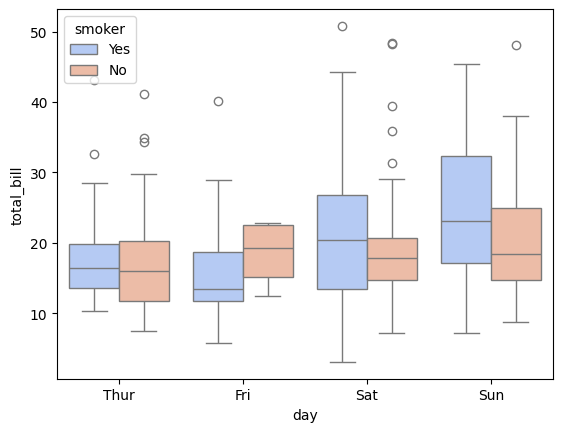

In [33]:
sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips,palette='coolwarm')

## violinplot

In [35]:
#similar to boxplot but it shoes a kernel density estimation of the distirbution

C:\Users\Hp\AppData\Local\Temp\ipykernel_26652\2619544300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day',y='total_bill',data=tips,palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

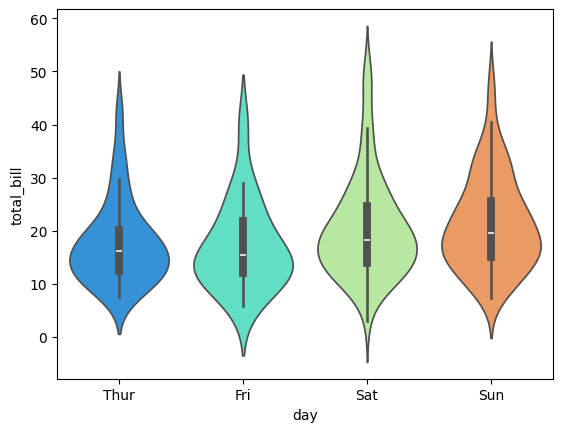

In [36]:
sns.violinplot(x='day',y='total_bill',data=tips,palette='rainbow')

<Axes: xlabel='day', ylabel='total_bill'>

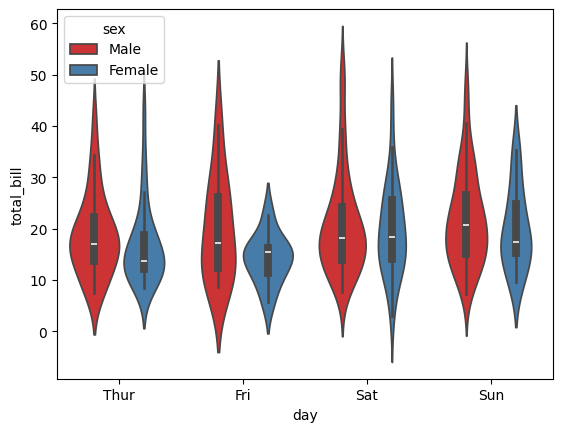

In [37]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

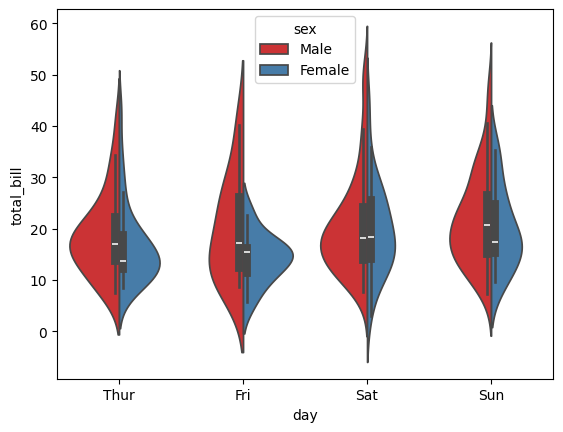

In [38]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot

<Axes: xlabel='day', ylabel='total_bill'>

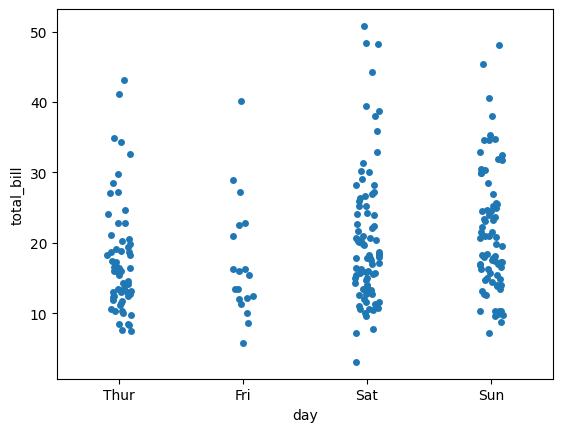

In [39]:
#ca scatterplot when one variable is categorical. shows all observations
sns.stripplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

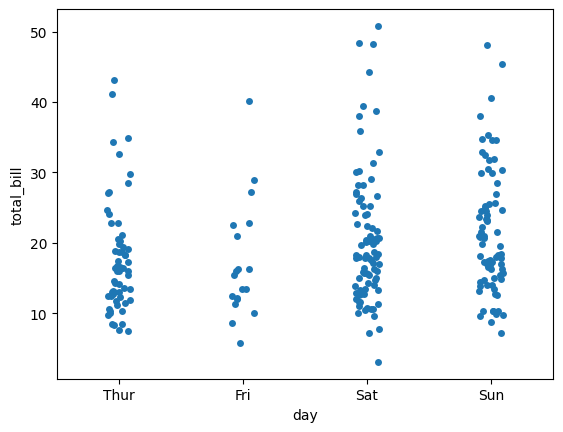

In [41]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True) #so we can see points clearly

<Axes: xlabel='day', ylabel='total_bill'>

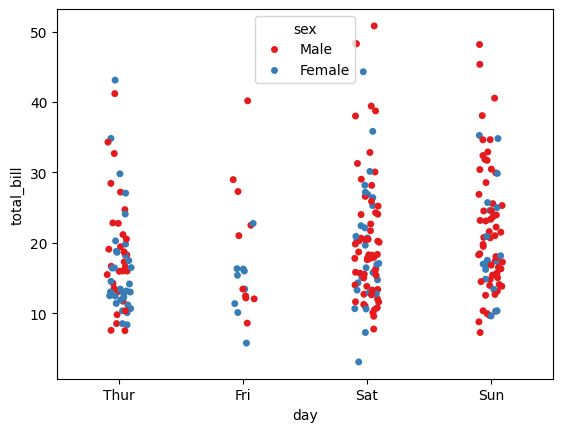

In [42]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

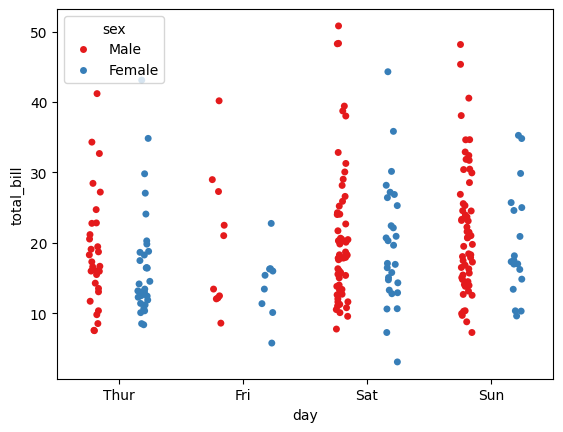

In [43]:
sns.stripplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1', dodge=True)
#split does not work for stripplot anymore, instead use dodge=true

## swarmplot

<Axes: xlabel='day', ylabel='total_bill'>

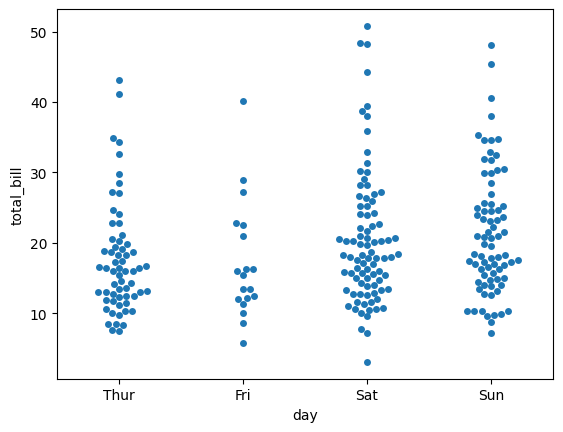

In [44]:
sns.swarmplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

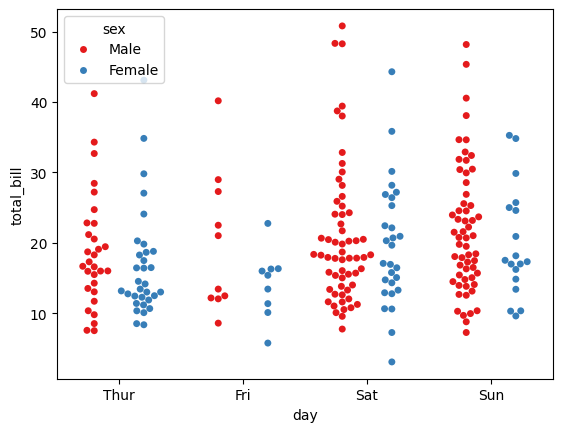

In [45]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True)

## combining categorical plots

C:\Users\Hp\AppData\Local\Temp\ipykernel_26652\734697897.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')


<Axes: xlabel='tip', ylabel='day'>

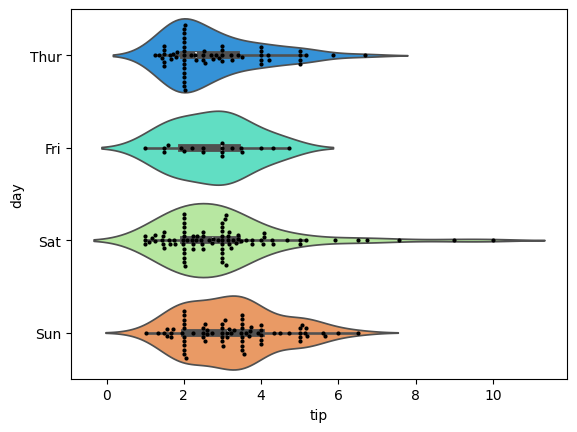

In [47]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## catplot

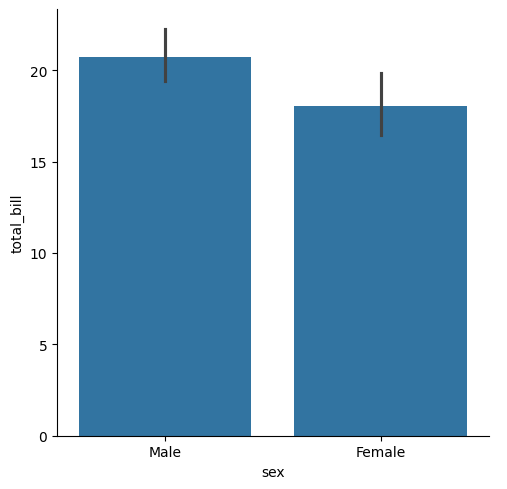

In [48]:
#most general form of categorical plot. 'kind' parameter for plot type
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar')

# Matrix Plots

In [49]:
#plot data as color-encoded matrices and can be used to indicate clusters within data

In [50]:
flights=sns.load_dataset('flights')

In [52]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
flights.head()




,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## heatmap

In [54]:
numeric_df=tips.select_dtypes(include=['number'])

In [55]:
corr_matrix=numeric_df.corr()

<Axes: >

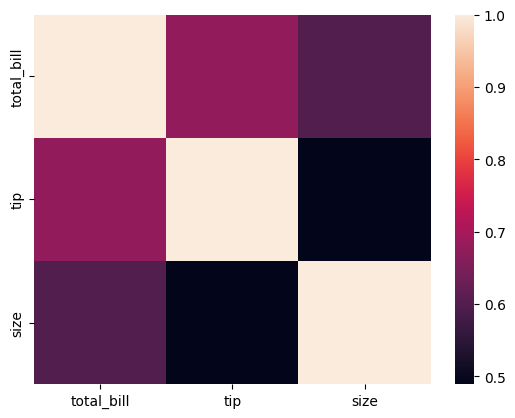

In [56]:
sns.heatmap(corr_matrix)

<Axes: >

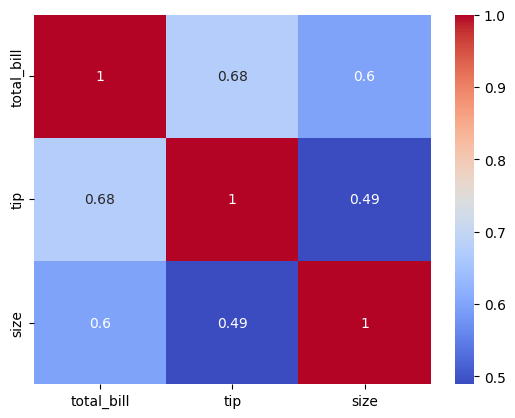

In [57]:
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

In [59]:
pvflights=flights.pivot_table(values='passengers',index='month',columns='year')

C:\Users\Hp\AppData\Local\Temp\ipykernel_26652\1382428181.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvflights=flights.pivot_table(values='passengers',index='month',columns='year')


<Axes: xlabel='year', ylabel='month'>

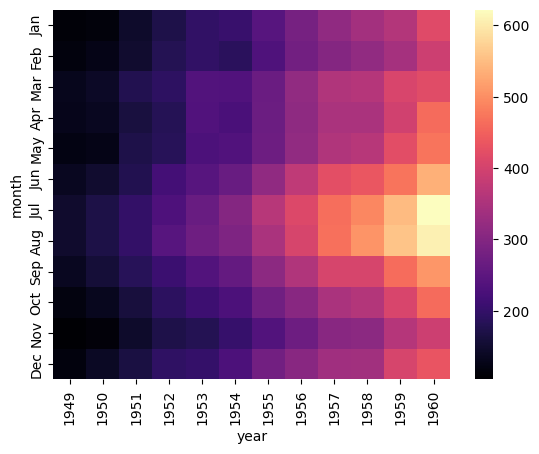

In [61]:
sns.heatmap(pvflights,cmap='magma')

<Axes: xlabel='year', ylabel='month'>

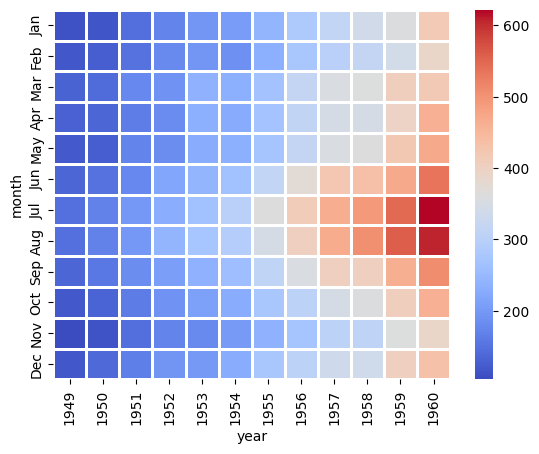

In [62]:
sns.heatmap(pvflights,cmap='coolwarm',linecolor='white',linewidths=1)

## cluster map


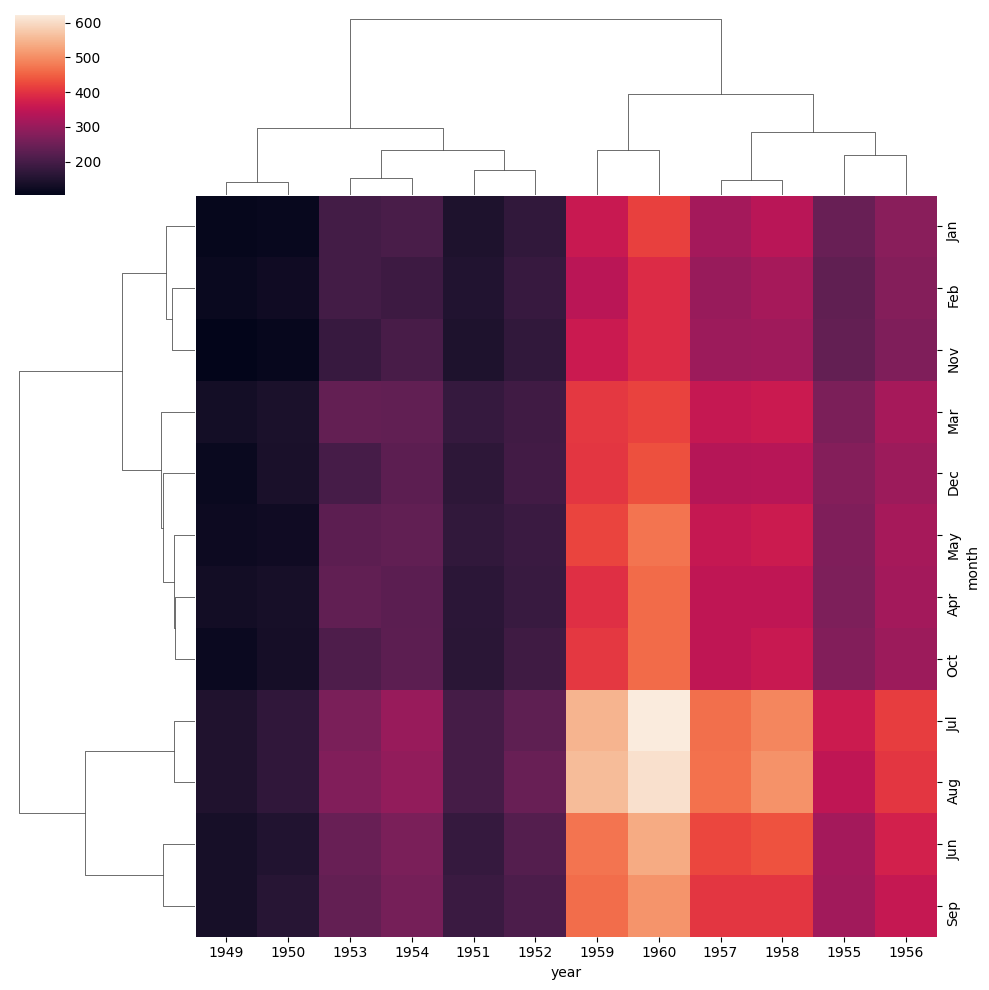

In [63]:
sns.clustermap(pvflights)

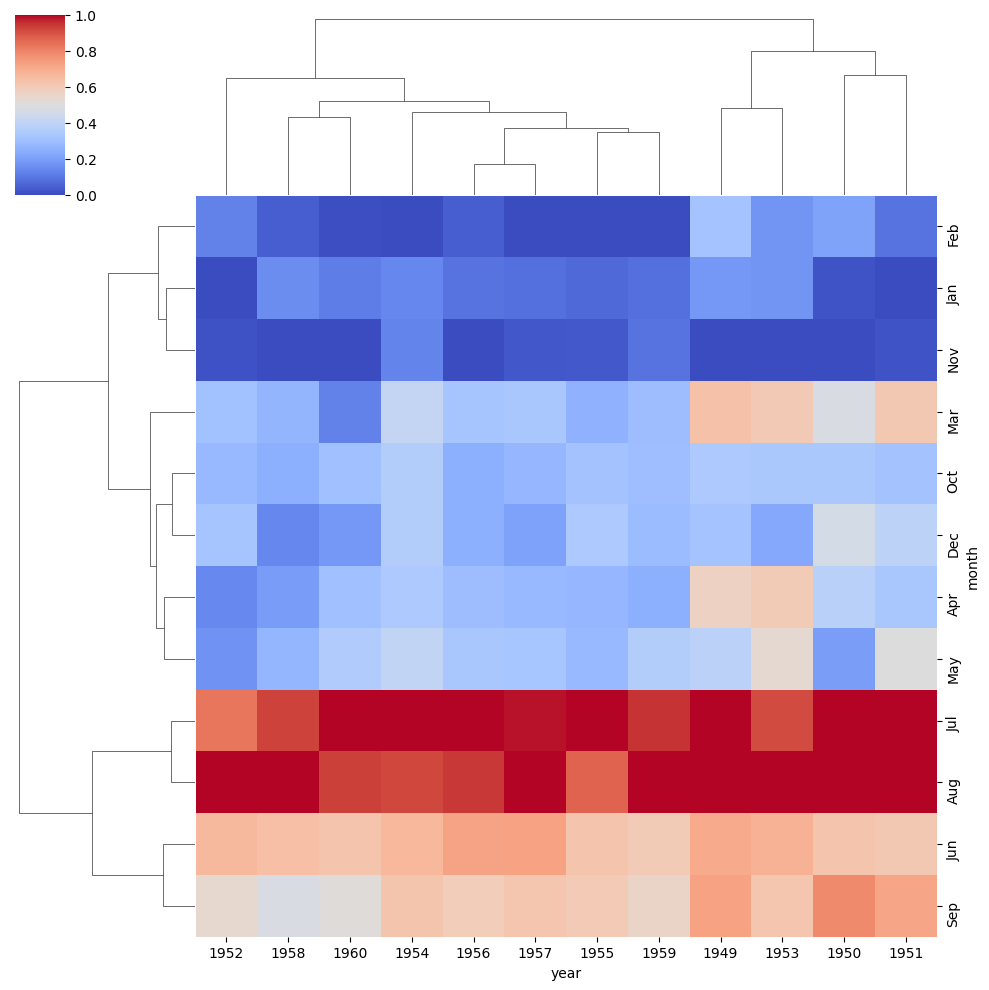

In [64]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Grids

In [66]:
iris=sns.load_dataset('iris')

In [67]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

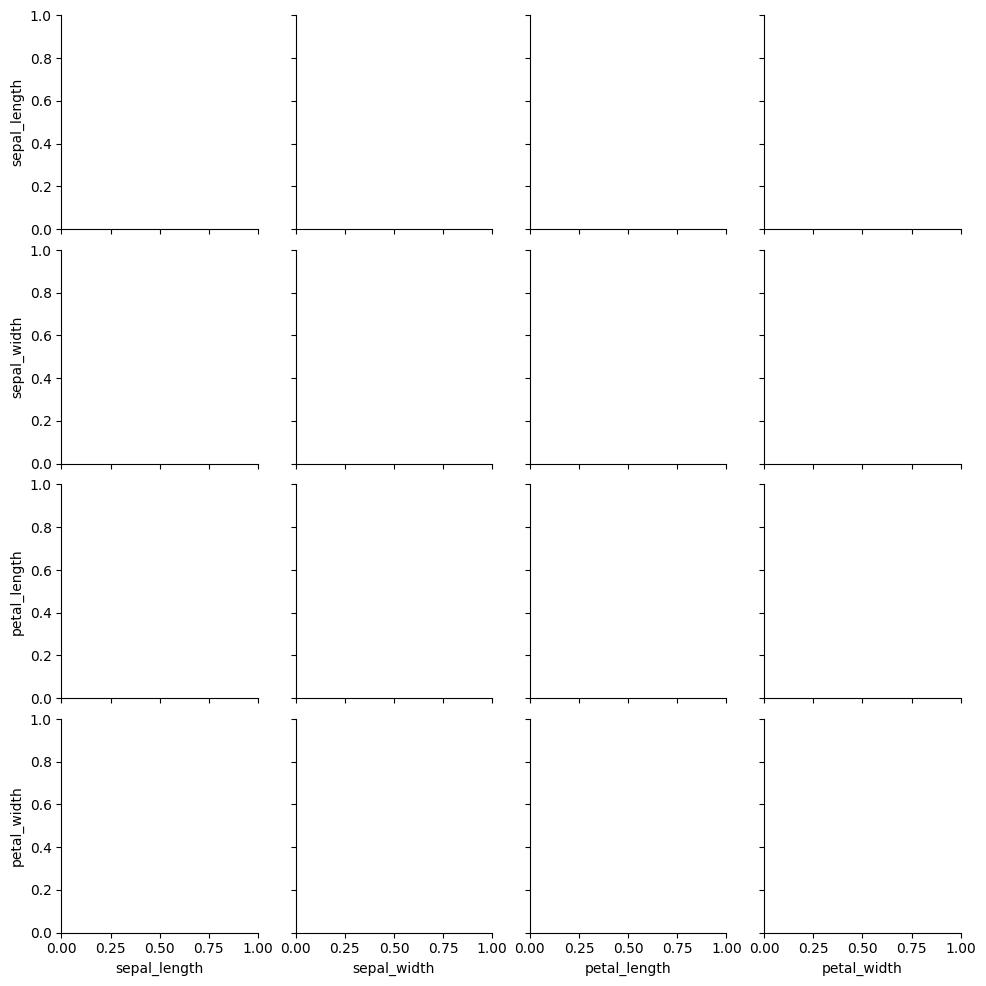

In [68]:
sns.PairGrid(iris)

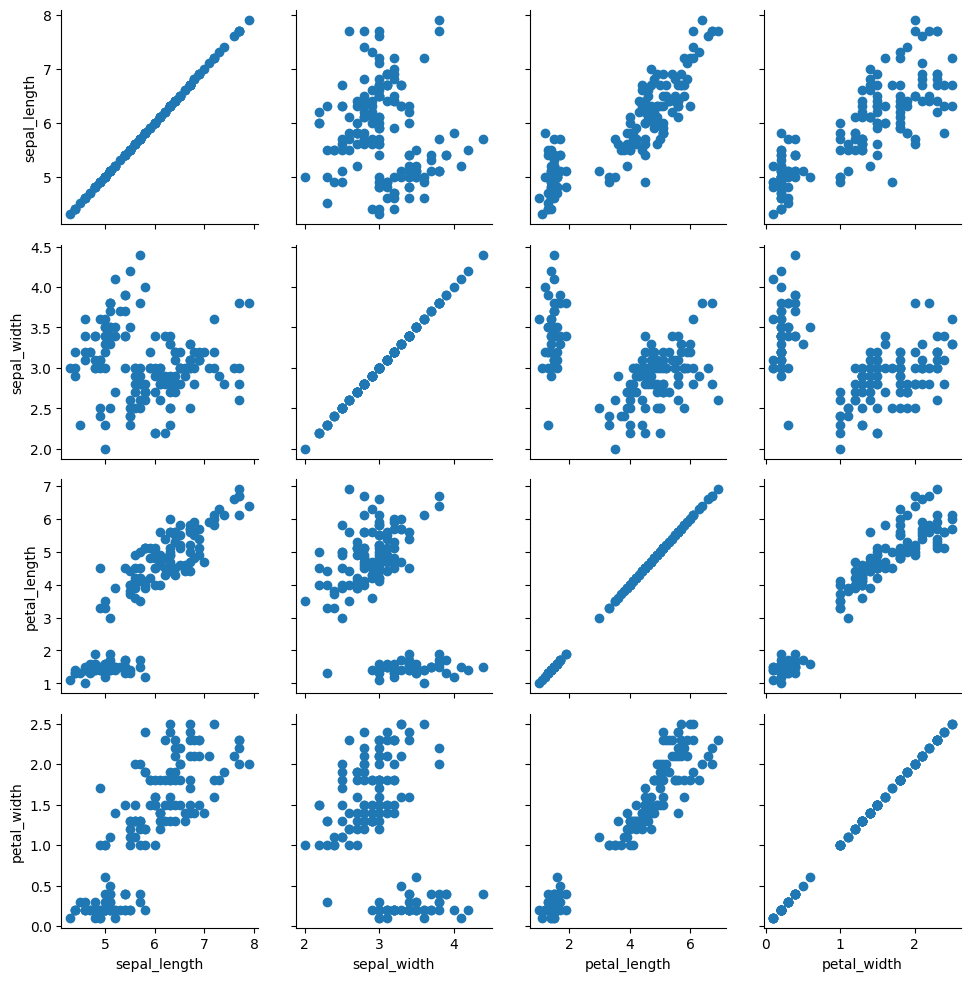

In [70]:
g=sns.PairGrid(iris)
g.map(plt.scatter)

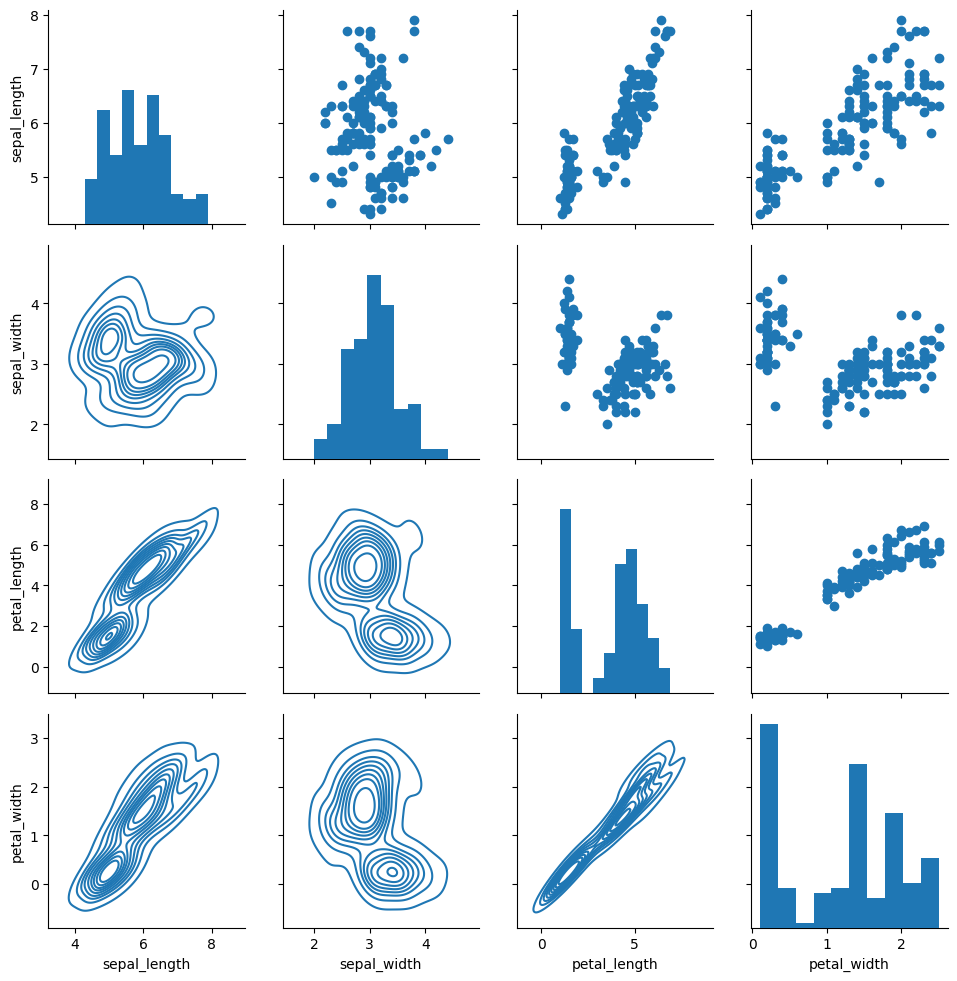

In [71]:
g=sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
#can also use pairplot

## Facet  Grid

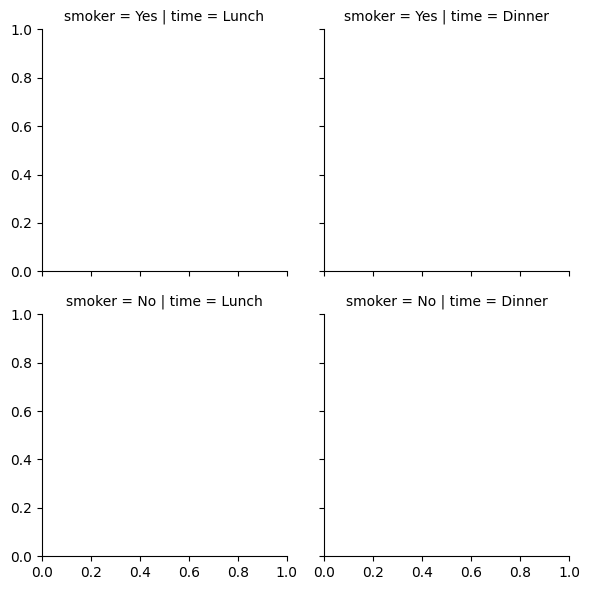

In [72]:
g=sns.FacetGrid(tips,col='time',row='smoker')

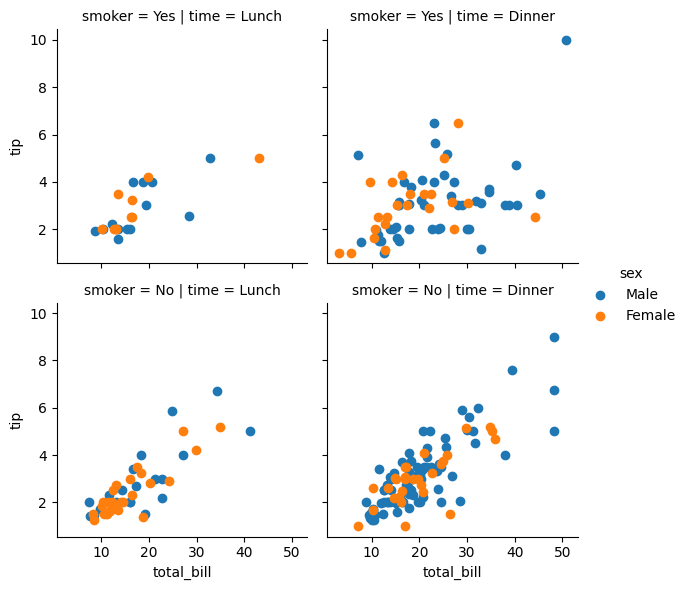

In [74]:
g=sns.FacetGrid(tips,col='time',row='smoker',hue='sex')
g=g.map(plt.scatter,'total_bill','tip').add_legend()

 ## Joint Grid

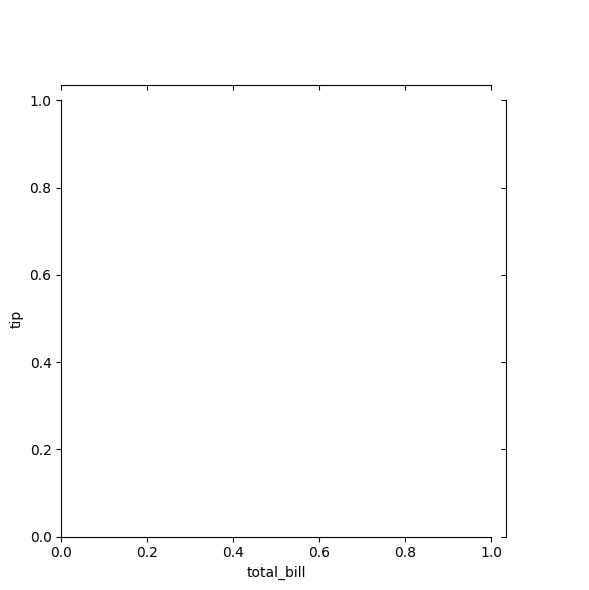

In [76]:
g=sns.JointGrid(x='total_bill',y='tip',data=tips)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

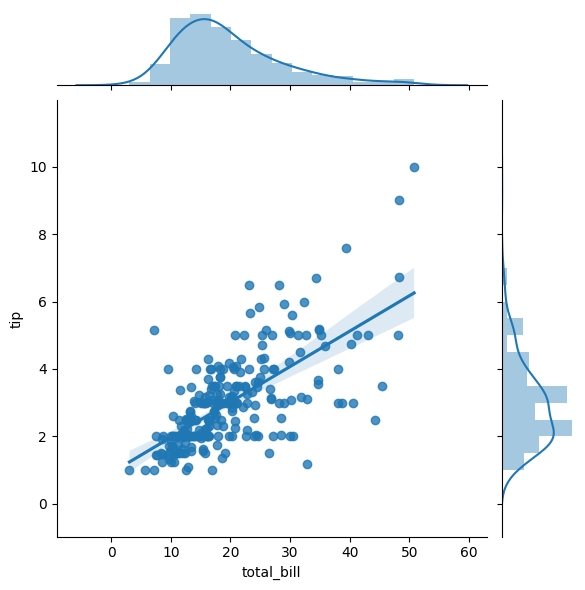

In [78]:
g=sns.JointGrid(x="total_bill",y="tip",data=tips)
g=g.plot(sns.regplot,sns.distplot)

# Regression Plots

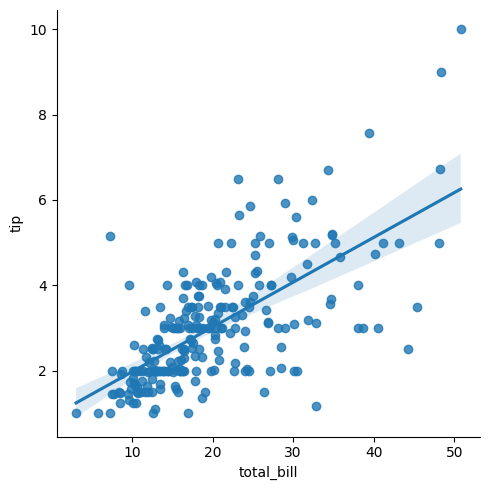

In [79]:
sns.lmplot(x='total_bill',y='tip',data=tips)

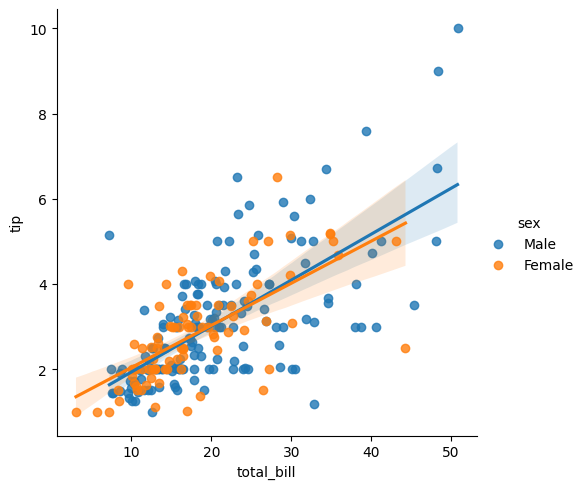

In [80]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

## Markers

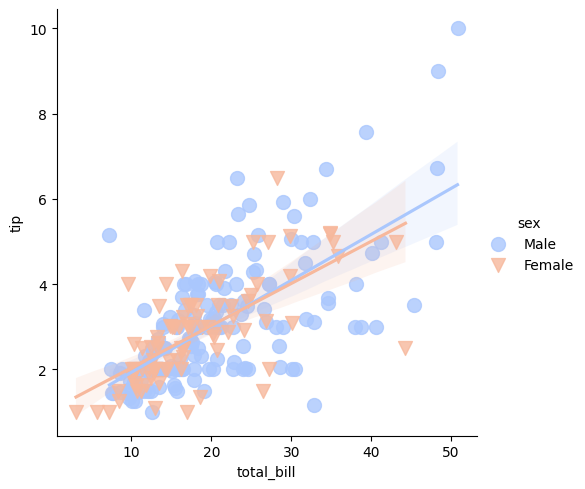

In [85]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',markers=['o','v'],scatter_kws={'s':100})
#scatter_kws s:100 changes size of markers

## Using a Grid

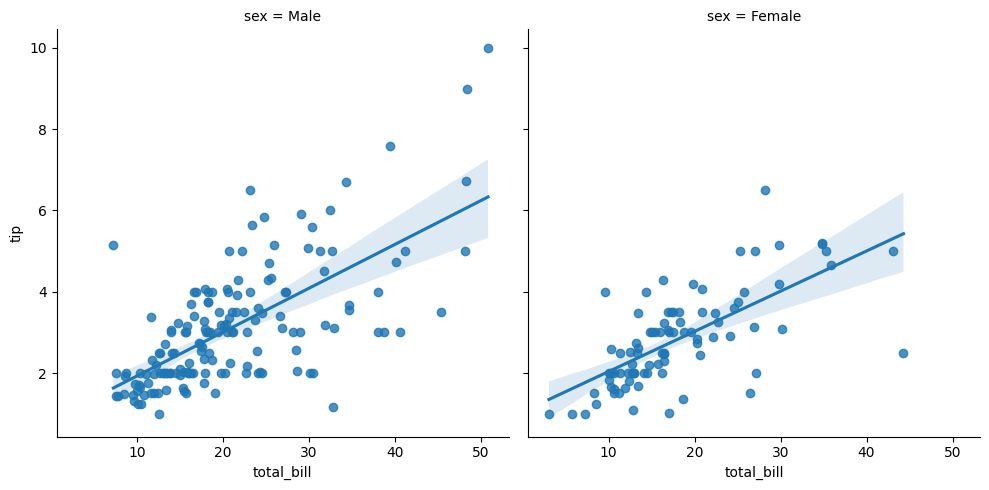

In [83]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

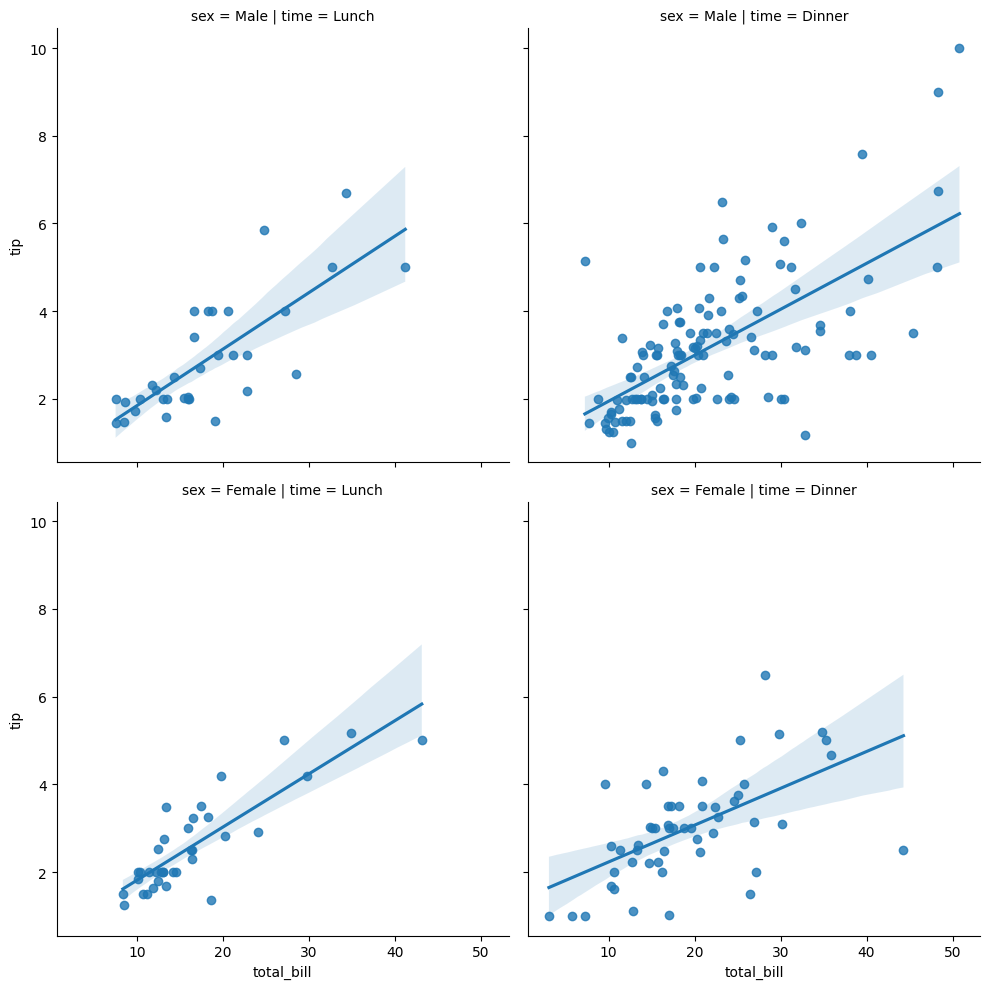

In [84]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

## Aspect and Size

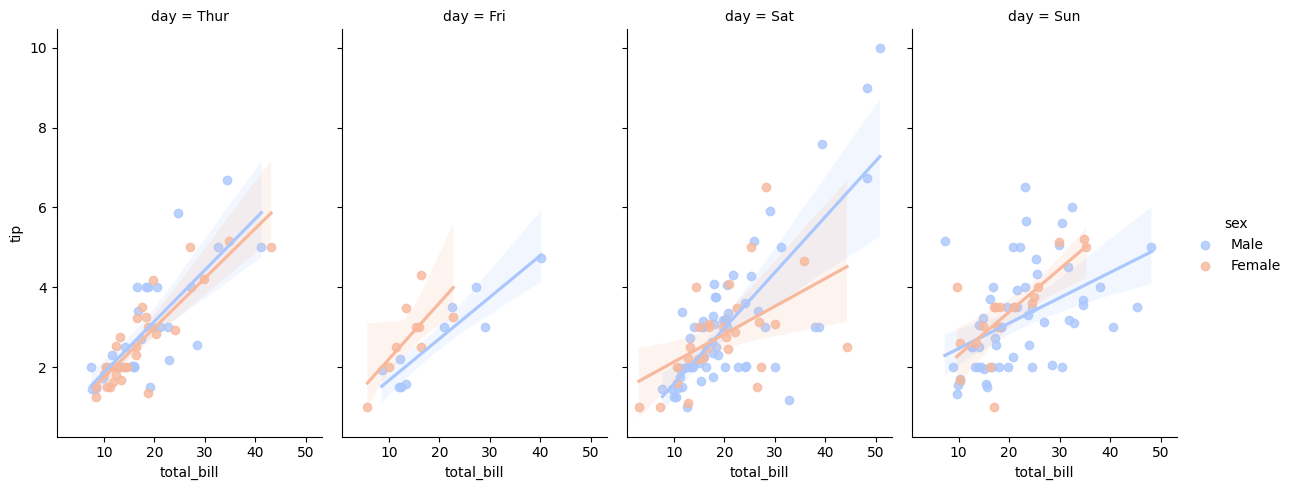

In [86]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6)

# Style and Colour

<Axes: xlabel='sex', ylabel='count'>

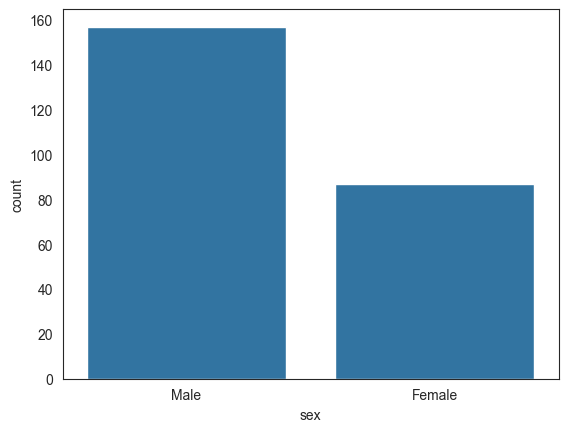

In [87]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

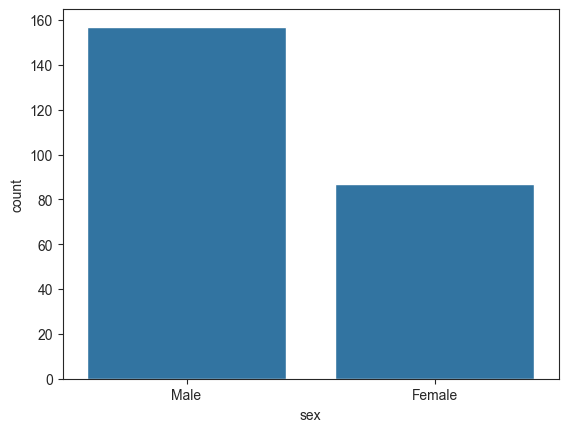

In [88]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

## spine removal

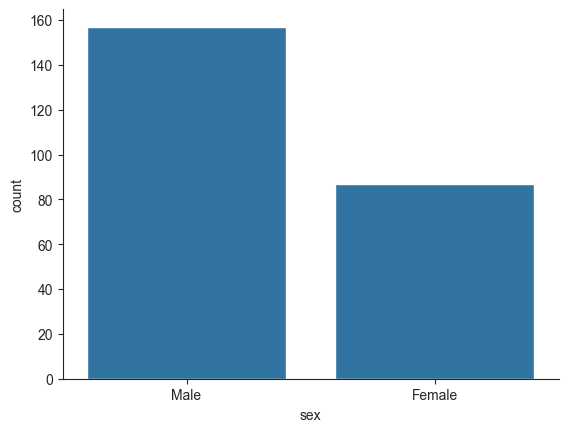

In [89]:
sns.countplot(x='sex',data=tips)
sns.despine()

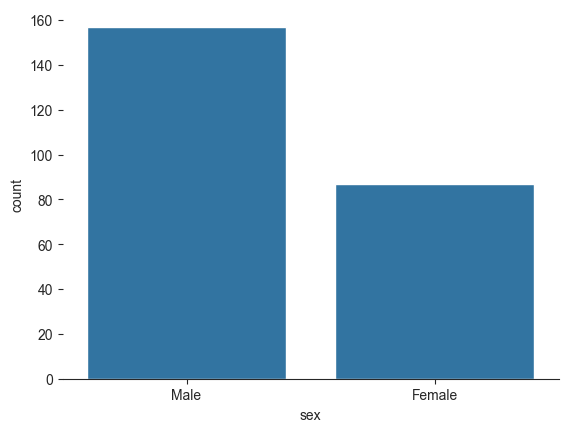

In [90]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Height and Aspect

<Axes: xlabel='sex', ylabel='count'>

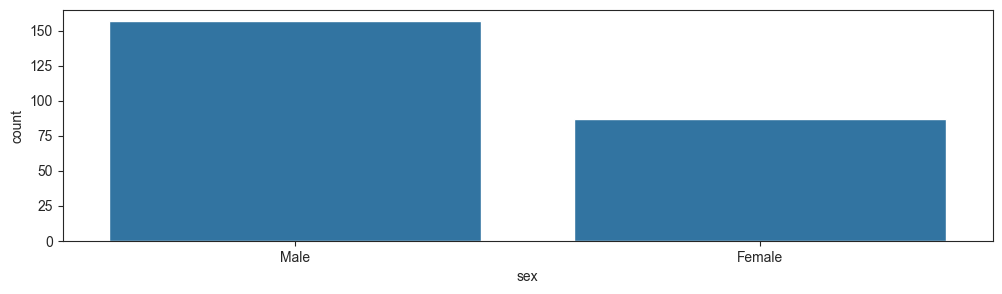

In [92]:
#we can change the size by using figsize or the height and aspect parameter of grid plots
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

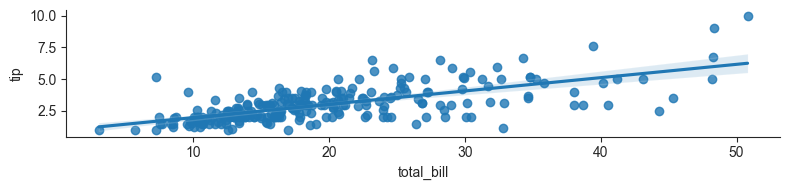

In [93]:
sns.lmplot(x='total_bill',y='tip',height=2,aspect=4,data=tips)

## Scale and Context

In [96]:
sns.set_context('talk',font_scale=2) #other contexts are notebook, paper,poster

<Axes: xlabel='sex', ylabel='count'>

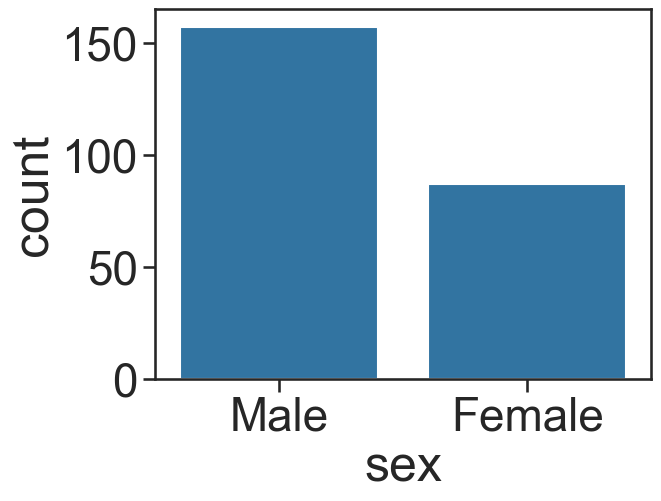

In [95]:
sns.countplot(x='sex',data=tips)